# Hello! 

This notebook is part of my exercise in Datacamp online courses. The dataset is gain from https://learn.datacamp.com/courses/analyzing-police-activity-with-pandas 

## 1. Preparing the data for analysis

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
ri = pd.read_csv('police.csv')

In [3]:
# head of the dataframe, many types has a null value
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
ri.tail()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3
91740,RI,2015-12-31,22:47,NaN,M,White,Registration Violation,Registration/plates,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [5]:
# 'state column in the DataFrame only contain one value'
ri.state.value_counts()

RI    91741
Name: state, dtype: int64

In [6]:
# count the null value in all column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [7]:
# see the shape of the DataFrame
ri.shape

(91741, 15)

In [8]:
# drop 'county_name' column because it have many missing values
# drop 'state' column because it not relevant and have the same value all over the row (RI)
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [9]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [10]:
# drop null column from driver_gender. 
ri.dropna(subset=['driver_gender'], inplace=True)

In [11]:
# many other column besides driver_gender that has the same missing value also dropping
# indicating that the missing value is not random for all other column
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [12]:
ri.shape

(86536, 13)

In [13]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


In [14]:
# change is_arrested column to bool 
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [15]:
ri['is_arrested'].dtype

dtype('bool')

In [16]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [17]:
# combining stop_date and stop_time to become a datetime 
ri.stop_date.dtype

dtype('O')

In [18]:
ri.stop_time.dtype

dtype('O')

In [19]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [20]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [21]:
ri['stop_datetime'].head()

0   2005-01-04 12:55:00
1   2005-01-23 23:15:00
2   2005-02-17 04:15:00
3   2005-02-20 17:15:00
4   2005-02-24 01:20:00
Name: stop_datetime, dtype: datetime64[ns]

In [22]:
# set the index to be stop_datetime
ri.set_index('stop_datetime', inplace=True)

In [23]:
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [24]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

## 2. Exploring the relationship between gender and policing

In [25]:
# type of violation being made
ri.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [26]:
# proportion of the violation
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

More than half of the violation is a Speeding Violation. Followed by Moving Violation and Equipment. Now, lets examine the difference in gender in terms of violation being made.

In [27]:
# violation proportion for female driver 
female = ri[ri['driver_gender'] == 'F']
female.violation.value_counts(normalize=True)

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [28]:
male = ri[ri['driver_gender'] == 'M']
male.violation.value_counts(normalize=True)

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

In the table above, you can see that 2/3 of female traffics stop are for speeding. Whereas for male driver is more balanced, although the speeding violation still dominate the proportion with more than a half. However, this does not indicate that females speed more often than males. Because we didn't take into account the number of stops or drivers.

Now, let us see the speeding outcome between two genders

In [29]:
# speeding outcome for female 
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

In [30]:
# speeding outcome for male
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]
male_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

It seems both males and females has roughly the same stop outcome for speeding: Citation (giving a ticket)

Now, let's calculate the search rate

In [31]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  bool  
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(3), object(10)
memory usage: 7.5+ MB


In [32]:
# which one to use? search_conducted or search_type? 

In [33]:
ri.search_conducted.head()

stop_datetime
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00    False
2005-02-24 01:20:00    False
Name: search_conducted, dtype: bool

In [34]:
ri.search_type.head()

stop_datetime
2005-01-04 12:55:00    NaN
2005-01-23 23:15:00    NaN
2005-02-17 04:15:00    NaN
2005-02-20 17:15:00    NaN
2005-02-24 01:20:00    NaN
Name: search_type, dtype: object

In [35]:
# use search_conducted to know which of the stoppings that result in search

In [36]:
# see the proportion of search_conducted 
ri.search_conducted.value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [37]:
ri.search_conducted.mean()

0.0382153092354627

Only 3% of traffic stop result in search of the vehicle. Thus, the search rate of the traffic stop in Rhode Island in this datasets is 3,8%

Let see the search rate group by the gender

In [38]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In this datasets, males got more search rate by 4,5% compare to females 1,9%

In [39]:
# grouping the proportion with violation and driver_gender 
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

Now, lets count the protective frisk in a search type. Protective frisk is a kind of search to check if the driver have a weapon in the vehicle.

In [40]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [41]:
# find the search type that have a 'Protective Frisk' substring in its value 
# assign in to the column, with boolean type
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [42]:
ri['frisk'].head()

stop_datetime
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00    False
2005-02-24 01:20:00    False
Name: frisk, dtype: bool

In [43]:
ri['frisk'].tail()

stop_datetime
2015-12-31 21:21:00    False
2015-12-31 21:59:00    False
2015-12-31 22:04:00    False
2015-12-31 22:09:00    False
2015-12-31 22:47:00    False
Name: frisk, dtype: bool

In [44]:
ri[ri['frisk'] == True].head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,
2005-10-06 21:35:00,2005-10-06,21:35,M,White,Speeding,Speeding,True,Protective Frisk,Citation,False,0-15 Min,False,Zone X4,True
2005-10-12 20:30:00,2005-10-12,20:30,M,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False,Zone K3,True
2005-10-13 07:15:00,2005-10-13,07:15,M,White,Other Traffic Violation,Moving violation,True,"Probable Cause,Protective Frisk,Reasonable Sus...",Arrest Passenger,True,16-30 Min,True,Zone K3,True
2005-10-17 02:20:00,2005-10-17,02:20,M,White,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,16-30 Min,False,Zone X4,True
2005-10-19 01:30:00,2005-10-19,01:30,M,White,Speeding,Speeding,True,Protective Frisk,Arrest Passenger,True,16-30 Min,True,Zone K3,True


In [45]:
# total number of frisk 
ri['frisk'].value_counts()

False    86233
True       303
Name: frisk, dtype: int64

It looks like 303 drivers were frisked during search

Lets compare the frisk rate by gender

In [46]:
# create new dataframe where the search is conducted 
searched = ri[ri.search_conducted == True]

In [47]:
searched.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,
2005-10-01 22:00:00,2005-10-01,22:00,M,White,Other Traffic Violation,Moving violation,True,Probable Cause,Citation,False,30+ Min,False,Zone K3,False
2005-10-02 09:30:00,2005-10-02,09:30,M,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone K1,False
2005-10-03 15:40:00,2005-10-03,15:40,M,Black,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,30+ Min,True,Zone X4,False
2005-10-05 03:00:00,2005-10-05,03:00,F,White,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,16-30 Min,True,Zone K2,False
2005-10-05 22:50:00,2005-10-05,22:50,M,Black,Speeding,Speeding,True,"Incident to Arrest,Probable Cause",Citation,False,30+ Min,False,Zone K1,False


In [48]:
searched.frisk.mean()

0.09162382824312065

9% of the searched, is frisked by the police

In [49]:
# see the frisked rate by gender 
searched.groupby(['driver_gender']).frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

## 3. Visual exploratory data analysis

First, lets calculate the hourly rate

In [50]:
# arrest rate
ri.is_arrested.mean()

0.0355690117407784

In [51]:
# arrest rate by hour
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

In [52]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

Now lets plot the hour rate 

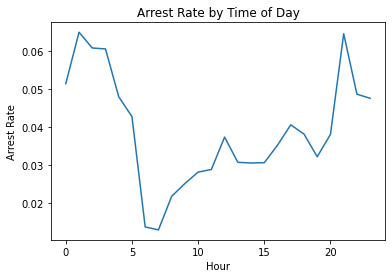

In [53]:
import matplotlib.pyplot as plt

hourly_arrest_rate.plot()

plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

plt.show()

Arrest rate is significantly spike overnight and then dips in the early morning hours.

In a small portion of traffic stops, drugs are found in the vehicle during a search. Lets plot drug related stops in the vehicle during search.

In [54]:
# resampling the column to calculate the annual rate of drug-related stops 
ri.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [55]:
# save the annual rate to a variable 
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

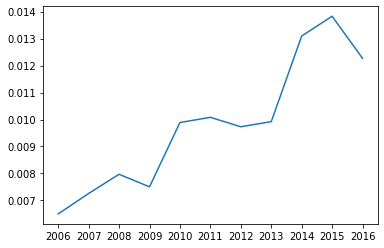

In [56]:
plt.plot(annual_drug_rate)
plt.show()

drug related searched is increasing over the year. An nearly double in the course of 10 years.

Lets see if the annual search rate over 10 years also increasing 

In [57]:
ri.search_conducted.resample('A').mean()

stop_datetime
2005-12-31    0.049167
2006-12-31    0.041758
2007-12-31    0.044056
2008-12-31    0.040310
2009-12-31    0.049861
2010-12-31    0.044805
2011-12-31    0.035682
2012-12-31    0.033616
2013-12-31    0.030022
2014-12-31    0.031801
2015-12-31    0.028497
Freq: A-DEC, Name: search_conducted, dtype: float64

In [58]:
annual_search_rate = ri.search_conducted.resample('A').mean()

In [59]:
# concat the two DataFrame 
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

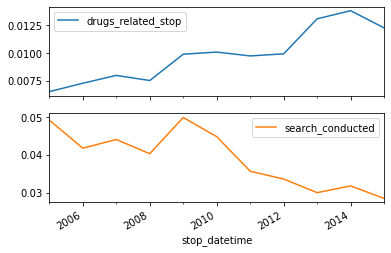

In [60]:
annual.plot(subplots=True)
plt.show()

It looks like the search rate is actually decreasing, while drug rate is increasing.

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police? 

In [61]:
# create a frequency table of districs and violation
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [62]:
# save the table to a variable
all_zones = pd.crosstab(ri.district, ri.violation)

In [63]:
# see the k zone first
k_zones = all_zones.loc['Zone K1':'Zone K3']

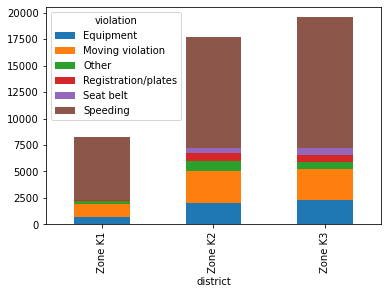

In [64]:
k_zones.plot(kind='bar', stacked=True)
plt.show()

Majority of violation in Zone K1 is for the Speeding violation. Zone K2 & Zone K3 almost have the same value. 

In [65]:
# see the x zone 
x_zones = all_zones.loc['Zone X1':'Zone X4']

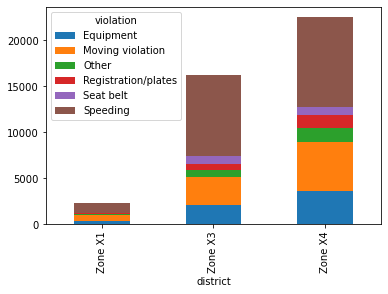

In [66]:
x_zones.plot(kind='bar', stacked=True)
plt.show()

Zone X! really have a small violation compare to other X district (or all district!)

Lets plot the stop length using other column

In [67]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False


In [68]:
ri.stop_duration.dtype

dtype('O')

I want to use 'stop_duration' column. But that column use a String/Object data type. Lets convert it first.

In [69]:
# first, see the unique value in stop_duration
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [70]:
# create a dictionary that maps the string into integer 
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)
ri.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

In [71]:
# group by 'violation_raw' to see the proportion of the minutes
# using 'violation_raw' because it contains more detail descriptions of the violation
ri.groupby(['violation_raw']).stop_minutes.mean()

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

In [72]:
# save the result to a variable 
stop_length = ri.groupby(['violation_raw']).stop_minutes.mean()

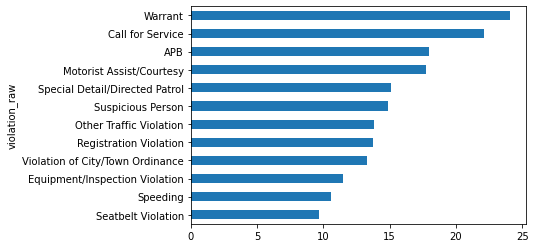

In [73]:
stop_length.sort_values().plot(kind='barh')
plt.show()

It looks like the warrant violation is more longer than other violation.

## Analyzing the effect of weather on policing

In [74]:
weather = pd.read_csv('weather.csv')

In [75]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [76]:
# describe the temperature column
weather[['TAVG','TMIN', 'TMAX']].describe()

,TAVG,TMIN,TMAX
count,1217.000000,4017.000000,4017.000000
mean,52.493016,43.484441,61.268608
std,17.830714,17.020298,18.199517
min,6.000000,-5.000000,15.000000
25%,39.000000,30.000000,47.000000
50%,54.000000,44.000000,62.000000
75%,68.000000,58.000000,77.000000
max,86.000000,77.000000,102.000000


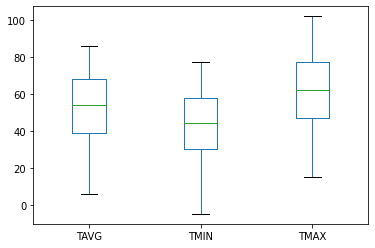

In [77]:
weather[['TAVG', 'TMIN', 'TMAX']].plot(kind='box')
plt.show()

<!-- the TAVG values are in between TMIN and TMAX -->

the TAVG values are in between TMIN and TMAX.

Now lets plot the temperature difference.

In [78]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

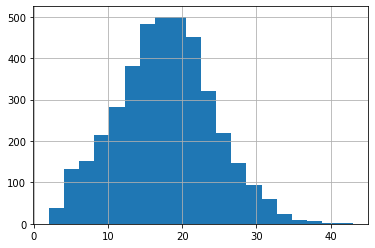

In [79]:
weather.TDIFF.hist(bins=20)
plt.show()

The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present). Lets quantify "how bad" the weather was each day by counting the number of 1 values in each row.

In [80]:
# copy a bad weather to new dframe
WT = weather.loc[:,'WT01':'WT22']

In [81]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [82]:
# assign new column, to calculate all bad conditions in each row
weather['bad_conditions'] = WT.sum(axis='columns')

In [83]:
# impute missing value with 0 
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

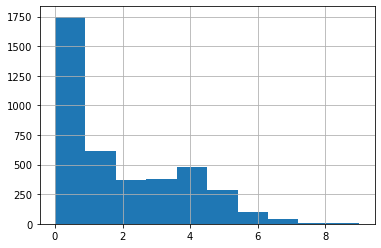

In [84]:
# visualize bad_conditions
weather['bad_conditions'].hist()
plt.show()

Only small portions of day have more than four bad coniditions. And many days have 0 bad conditions.

Lets rating the bad conditions to have more informative visualization.

In [85]:
# sorting the index according how many bad conditions in a day have
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [86]:
mapping = {0: 'good', 1: 'bad', 2: 'bad', 3: 'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [87]:
weather['rating'] = weather.bad_conditions.map(mapping)

In [88]:
weather['rating'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: object

In [89]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2,bad
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16,2,bad
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9,3,bad
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6,4,bad
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15,4,bad


Lets merge the two dataframe

In [90]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [97]:
# reset the index so that the index of the merged dframe should be stop_datetime also
ri.reset_index(inplace=True)

In [98]:
ri.head()

,level_0,index,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,0,0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,1,1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2,2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,3,3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,4,4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [99]:
ri_weather = pd.merge(left=ri, right=weather, left_on='stop_date', right_on='DATE', how='left')

In [100]:
ri_weather.columns

Index(['level_0', 'index', 'stop_datetime', 'stop_date', 'stop_time',
       'driver_gender', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'district', 'frisk',
       'stop_minutes', 'STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND',
       'WSF2', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08',
       'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18',
       'WT19', 'WT21', 'WT22', 'TDIFF', 'bad_conditions', 'rating'],
      dtype='object')

In [101]:
ri_weather.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            86526, 86527, 86528, 86529, 86530, 86531, 86532, 86533, 86534,
            86535],
           dtype='int64', length=86536)

In [102]:
# make stop_datetime the index again 
ri_weather.set_index('stop_datetime', inplace=True)

In [103]:
ri_weather.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

**lets see if weather have an effect on arrest rate**

In [104]:
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

In [105]:
arrest_rate

violation            rating
Equipment            bad       0.066311
                     good      0.059007
                     worse     0.097357
Moving violation     bad       0.058050
                     good      0.056227
                     worse     0.065860
Other                bad       0.087443
                     good      0.076966
                     worse     0.062893
Registration/plates  bad       0.098160
                     good      0.081574
                     worse     0.115625
Seat belt            bad       0.022493
                     good      0.028587
                     worse     0.000000
Speeding             bad       0.013314
                     good      0.013405
                     worse     0.016886
Name: is_arrested, dtype: float64

In [112]:
# make it a dframe
df_ar = arrest_rate.unstack()

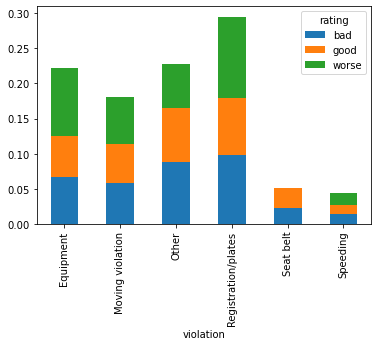

In [113]:
# plot the arrest_rate
df_ar.plot(kind='bar', stacked=True)
plt.show()

arrest rate tend to increase if the weather is getting worse, but not significant.